<a href="https://colab.research.google.com/github/KiranVarghese25/Predictive_analytics/blob/main/2348525_lab3_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab -3

In [185]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [186]:
#Loading the dataset

df=pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [187]:
df['City'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami',
       'Houston'], dtype=object)

In [188]:
#Info abou the dataset
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [189]:
#Checking for null values
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [190]:
#Generating Synthetic data
n=60000

data = {
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Age': np.random.randint(18, 70, n),
    'City': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami', 'Houston'], n),
    'Membership Type': np.random.choice(['Gold', 'Silver', 'Bronze'], n),
    'Total Spend': np.round(np.random.uniform(500, 1500, n), 2),
    'Items Purchased': np.random.randint(5, 20, n),
    'Average Rating': np.round(np.random.uniform(1, 5, n), 1),
    'Discount Applied': np.random.choice([True, False], n),
    'Days Since Last Purchase': np.random.randint(0, 365, n),
    'Satisfaction Level': np.random.choice(['Satisfied', 'Neutral', 'Unsatisfied'], n)
}

df1= pd.DataFrame(data)

df=pd.concat([df, df1], ignore_index=True)
print(df.head())


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0        101.0  Female   29       New York            Gold      1120.20   
1        102.0    Male   34    Los Angeles          Silver       780.50   
2        103.0  Female   43        Chicago          Bronze       510.75   
3        104.0    Male   30  San Francisco            Gold      1480.30   
4        105.0    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [191]:
#removing the null values
df.dropna(inplace=True)

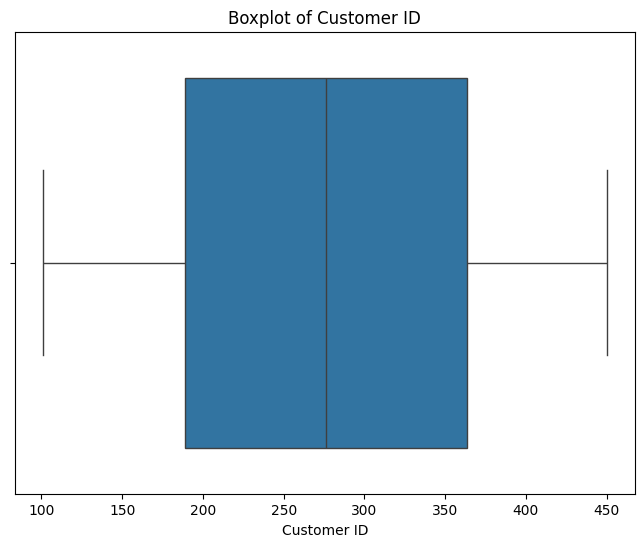

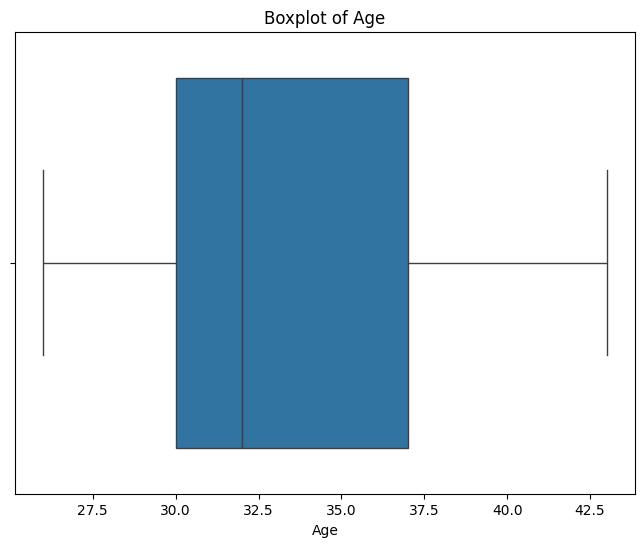

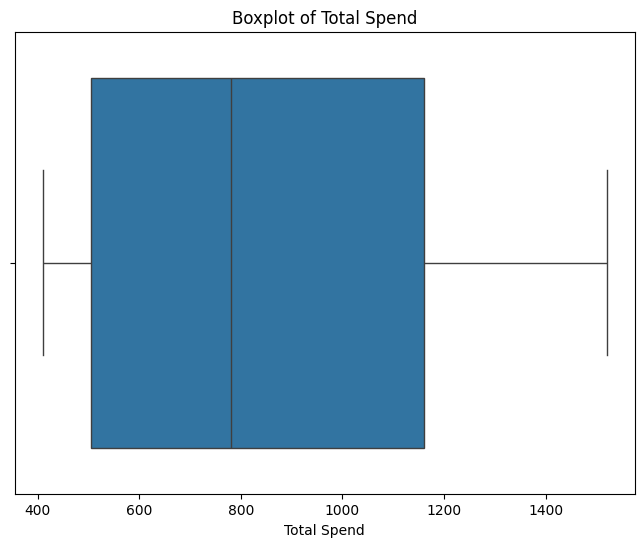

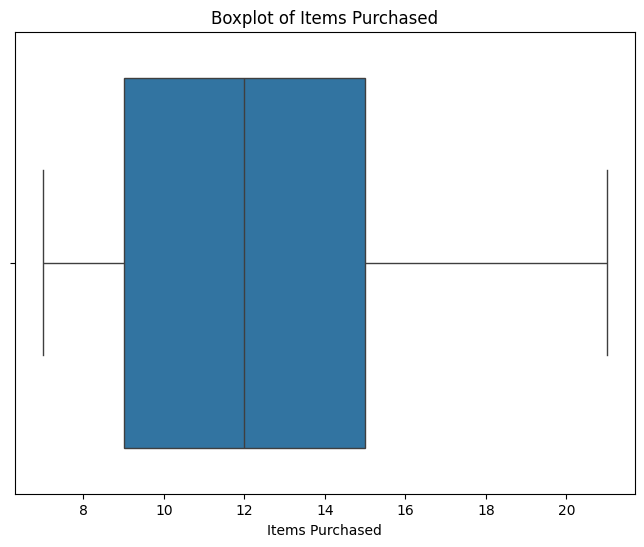

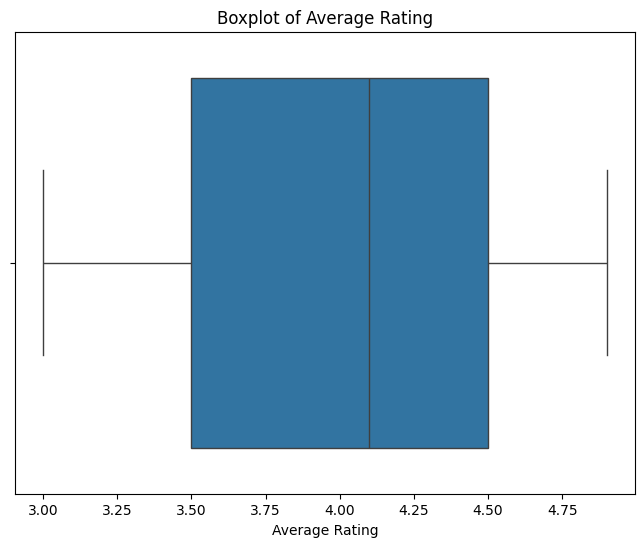

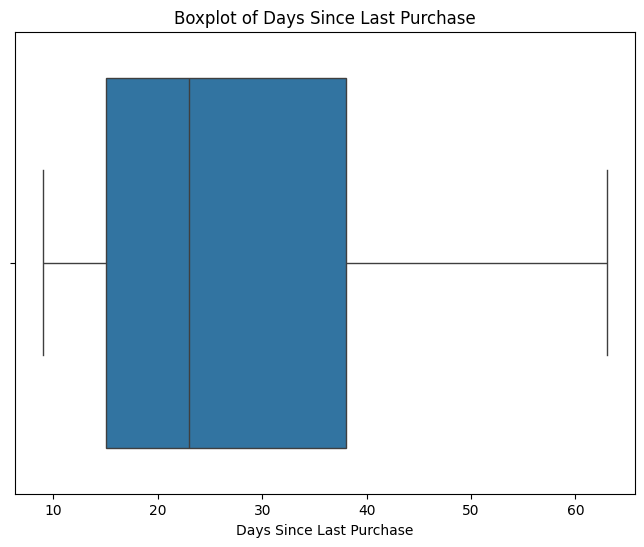

In [192]:
#Outliers
for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

In [193]:
# Outliers using Z score

z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
threshold = 3
outlier_rows=(z > threshold).any(axis=1)
df=df[~outlier_rows]
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df.shape)

Original DataFrame shape: (348, 11)
DataFrame shape after removing outliers: (348, 11)


In [194]:
# Encoding
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
  df[column] = le.fit_transform(df[column])

print(df.head())


   Customer ID  Gender  Age  City  Membership Type  Total Spend  \
0        101.0       0   29     4                1      1120.20   
1        102.0       1   34     2                2       780.50   
2        103.0       0   43     0                0       510.75   
3        104.0       1   30     5                1      1480.30   
4        105.0       1   27     3                2       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase  Satisfaction Level  
0                        25                   1  
1                        18                   0  
2                        42                   2  
3                        12                   1  
4         

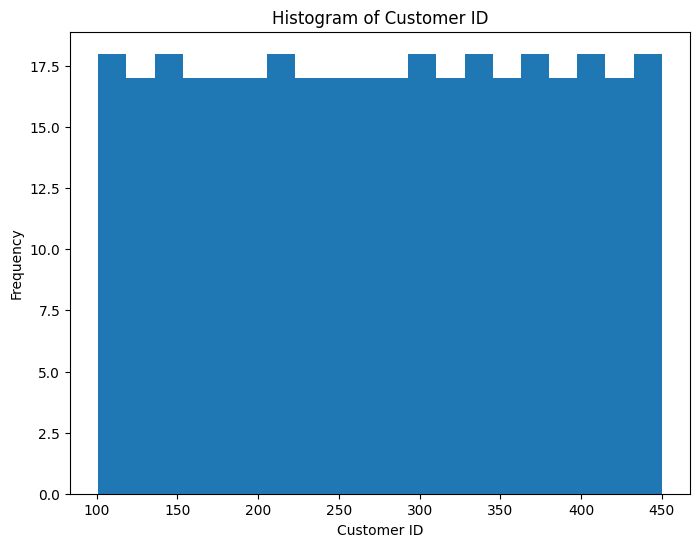

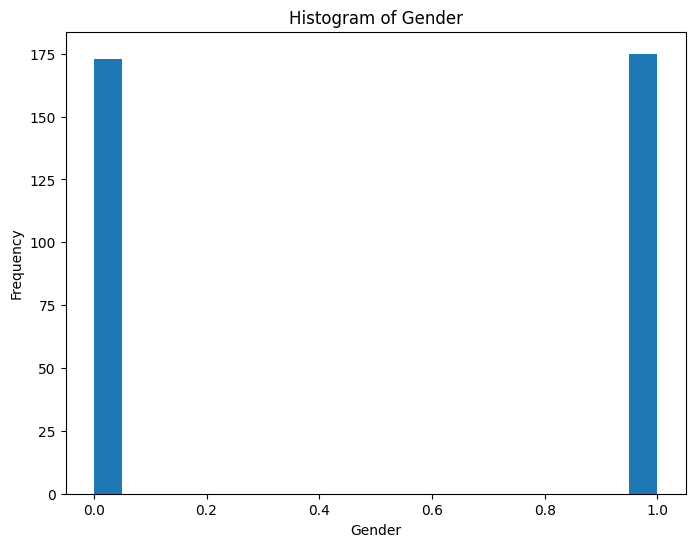

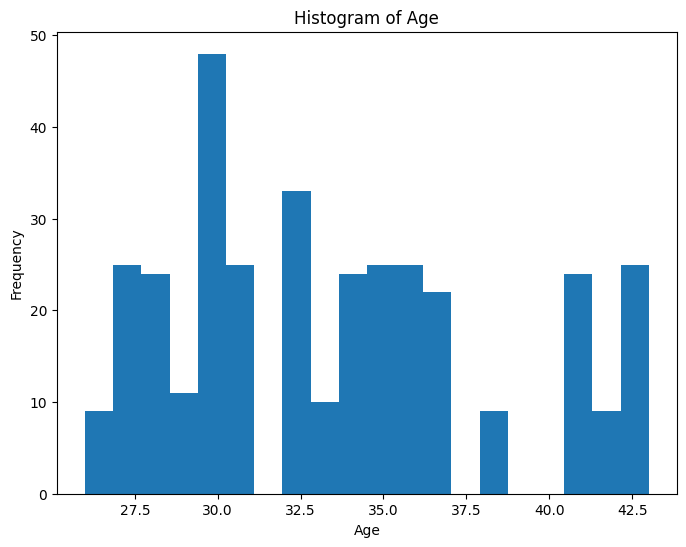

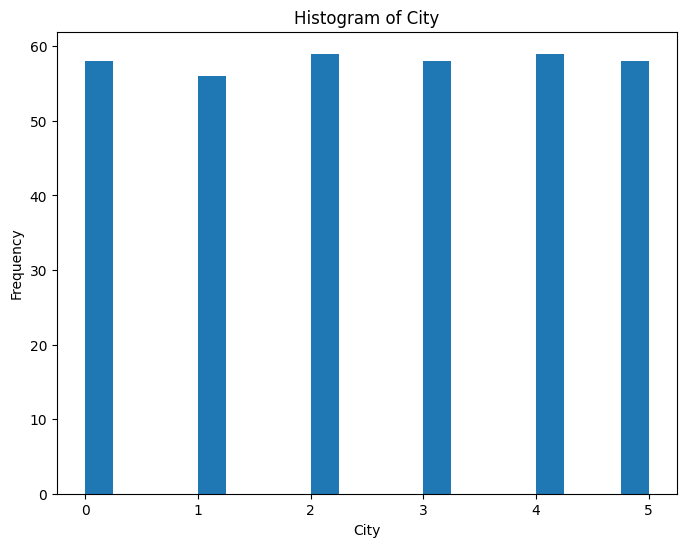

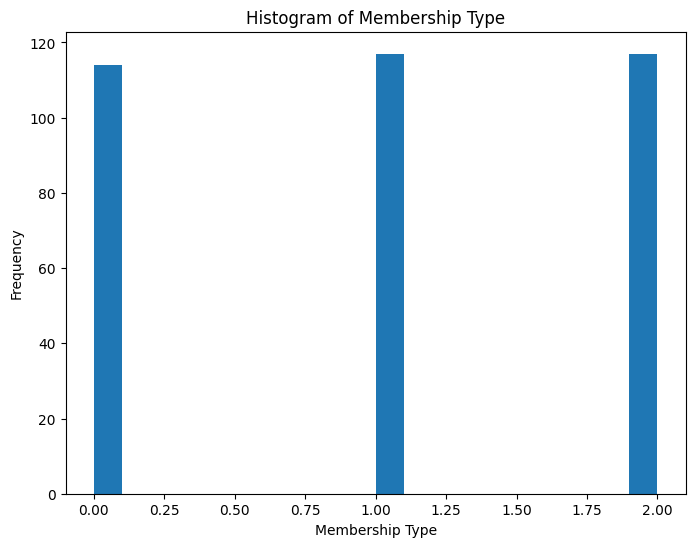

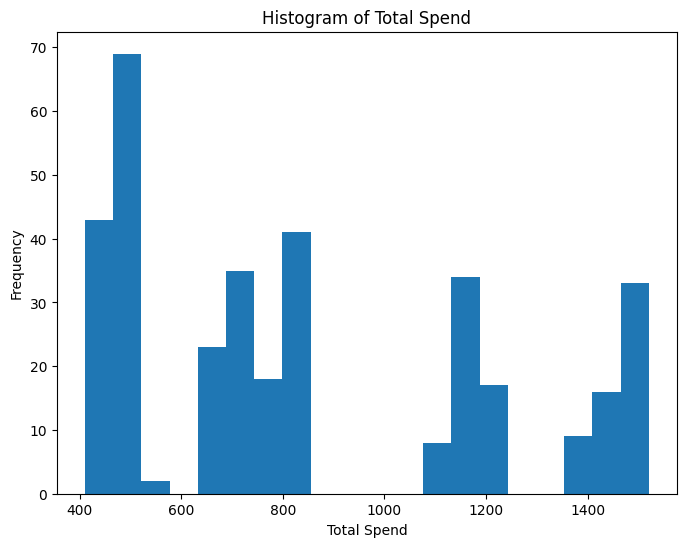

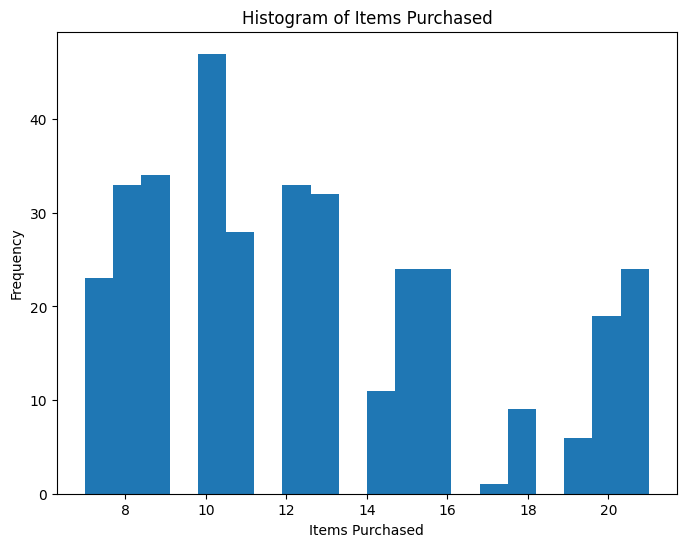

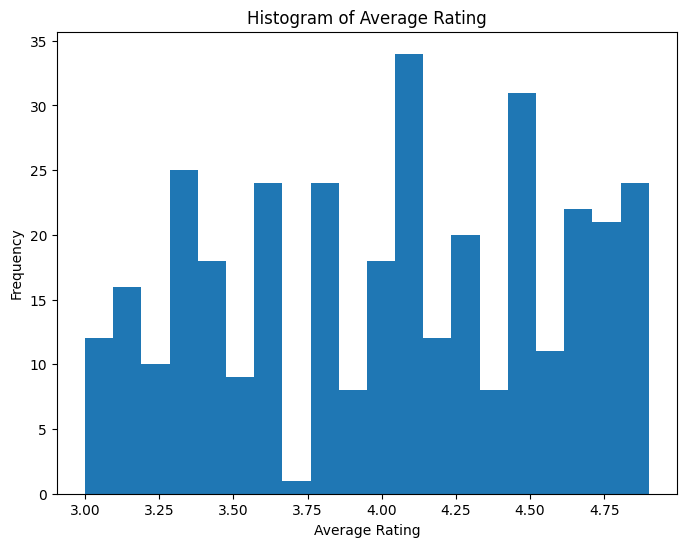

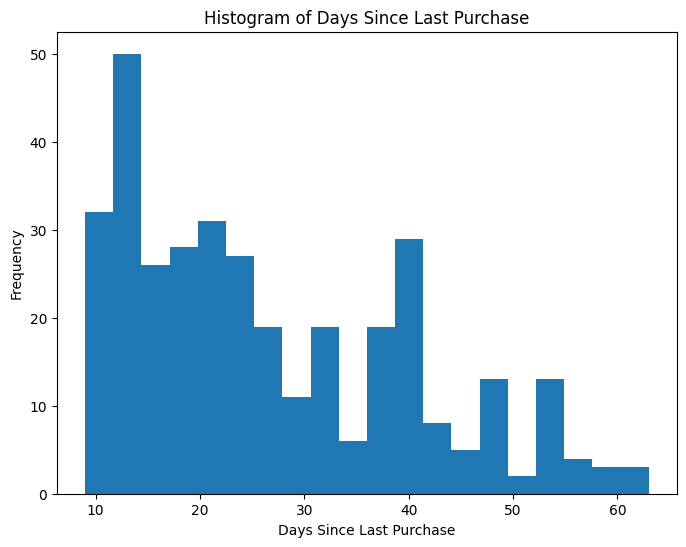

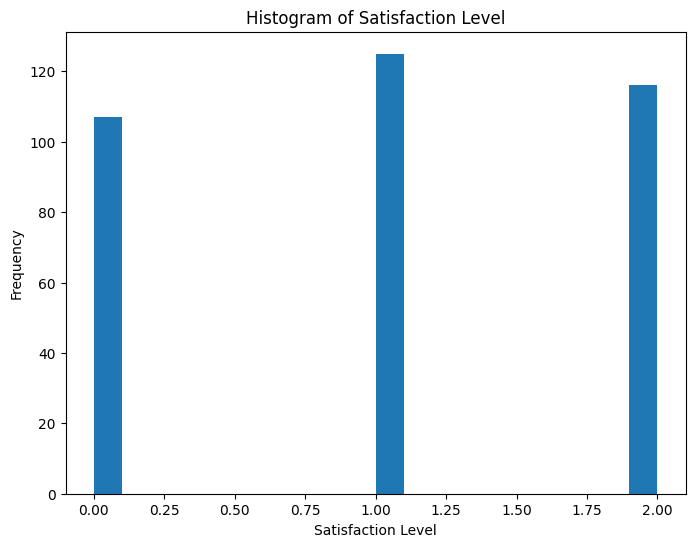

In [195]:
# DIstribution to check if there is skewness

for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=20)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {column}")
  plt.show()


In [196]:
# Removing non-important features from the df
df=df.drop(['Customer ID'],axis=1)

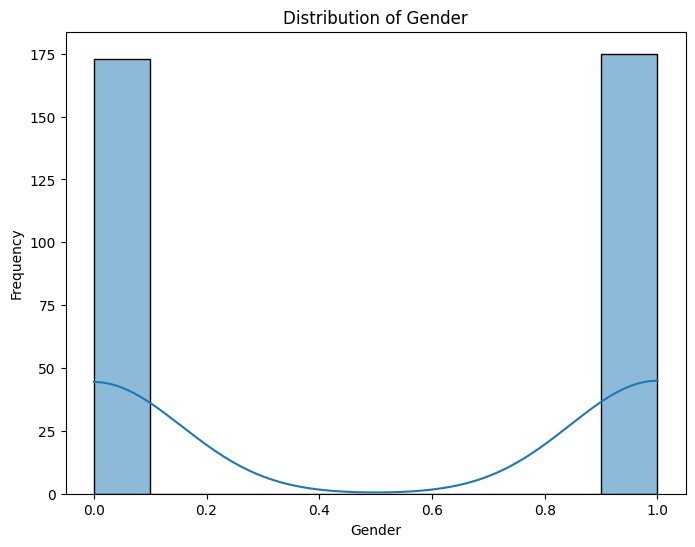

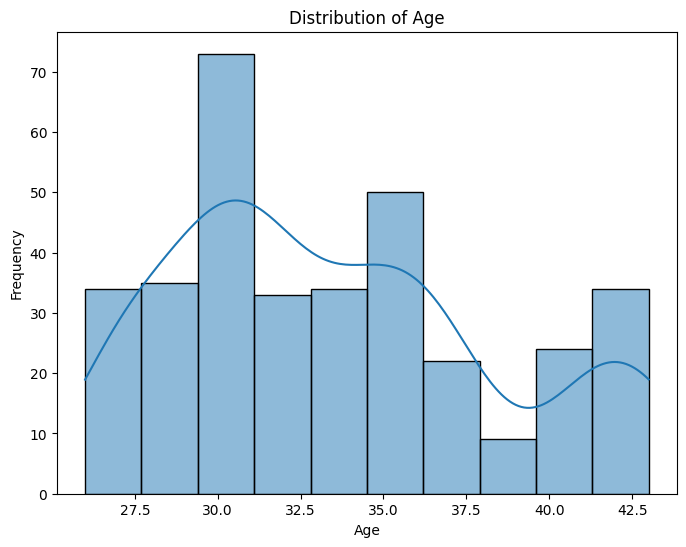

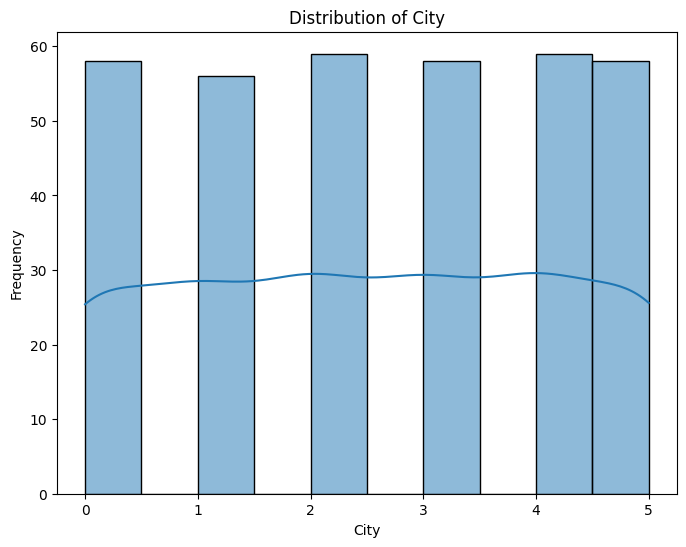

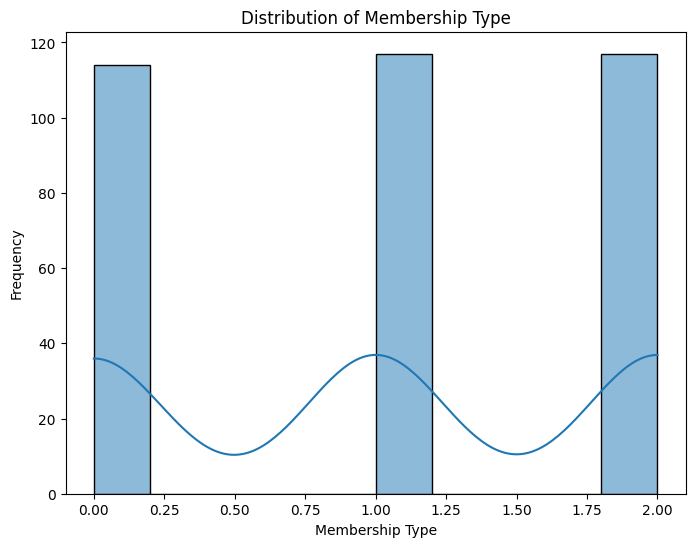

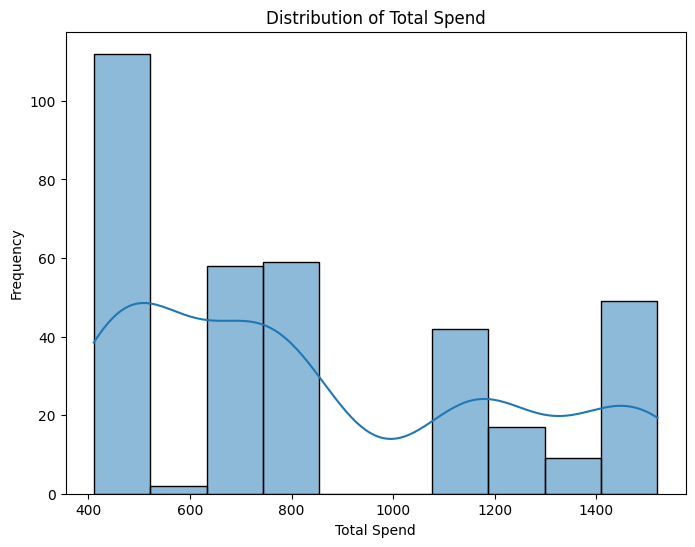

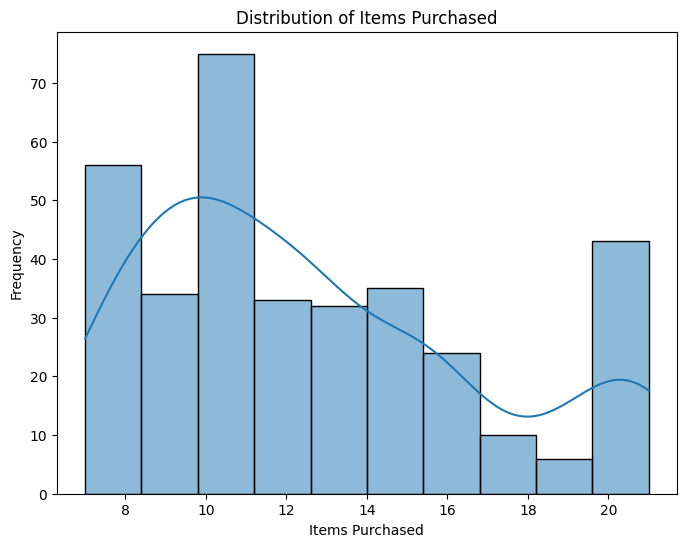

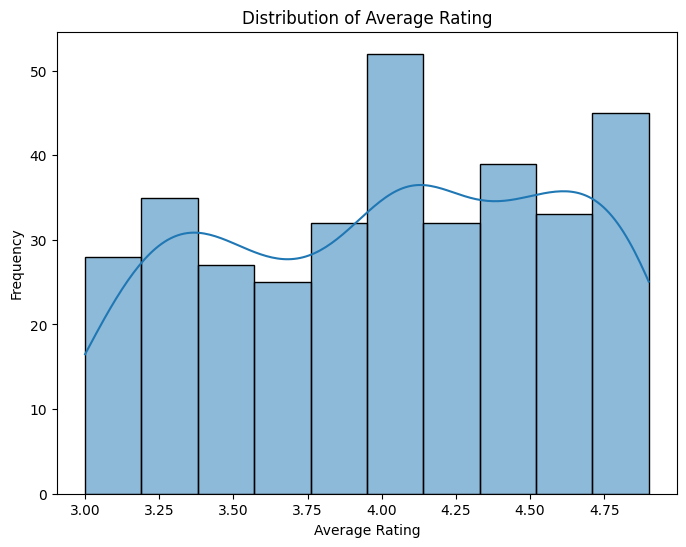

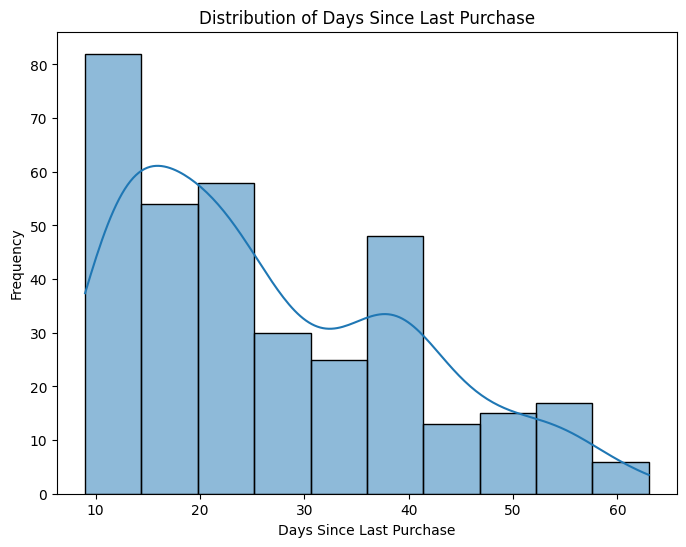

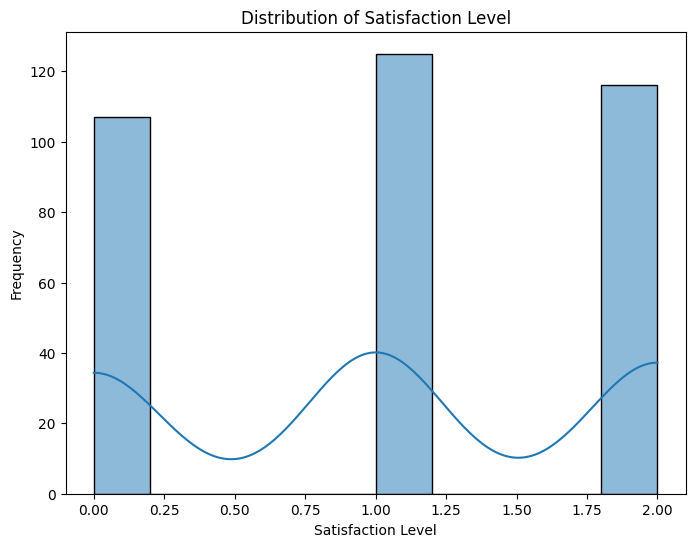

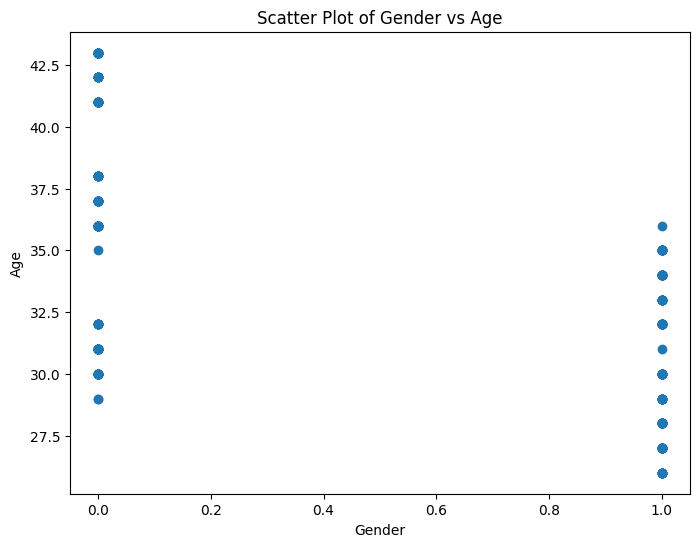

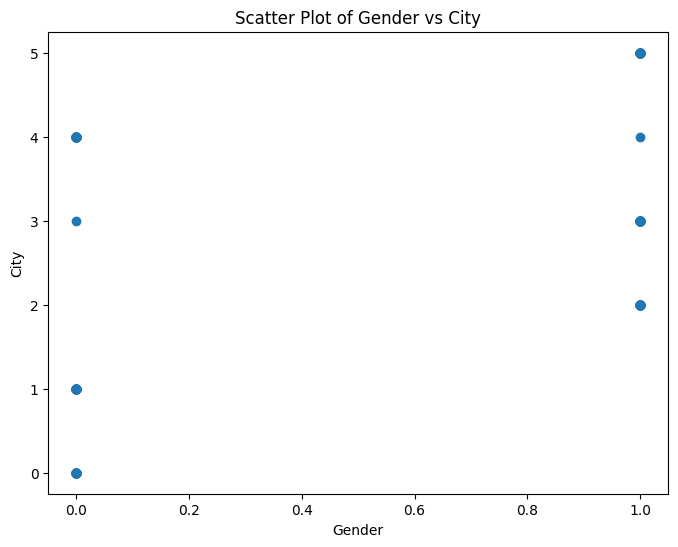

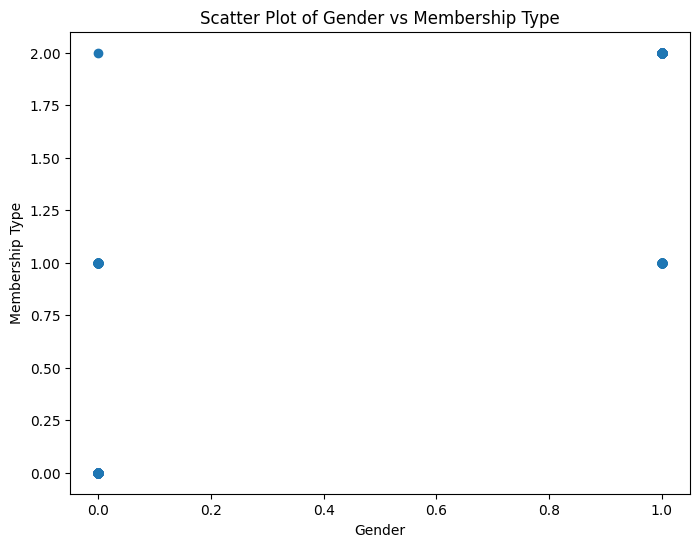

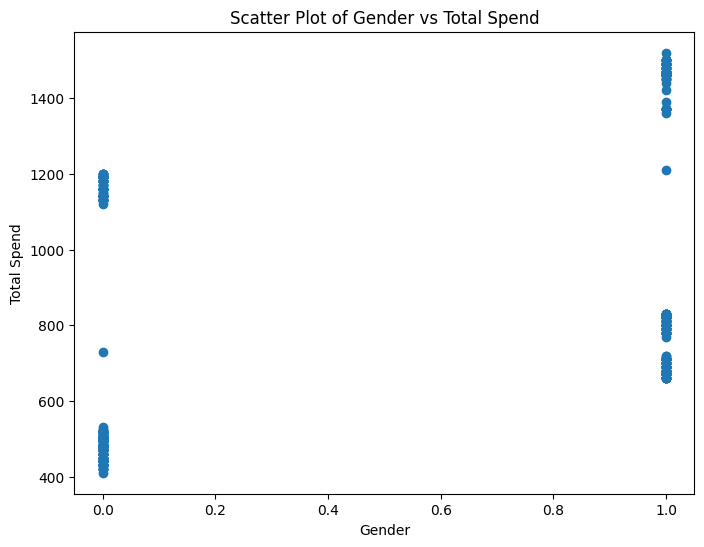

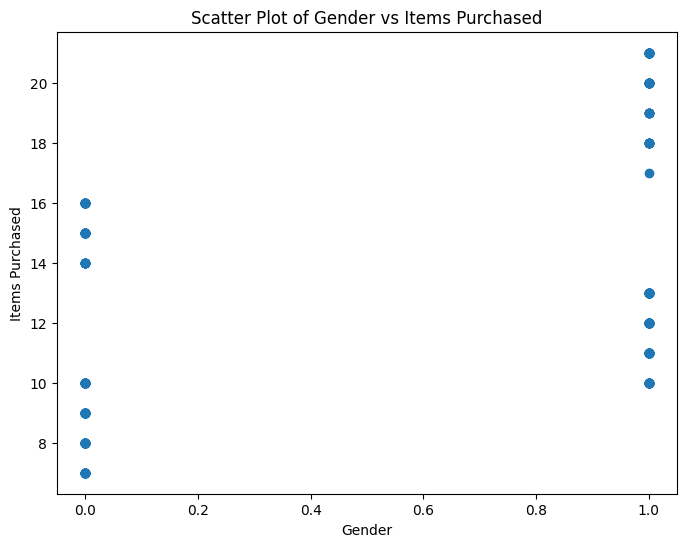

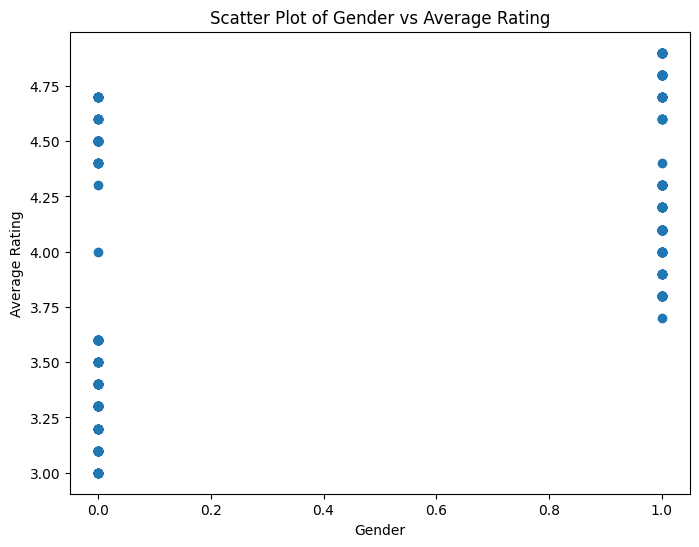

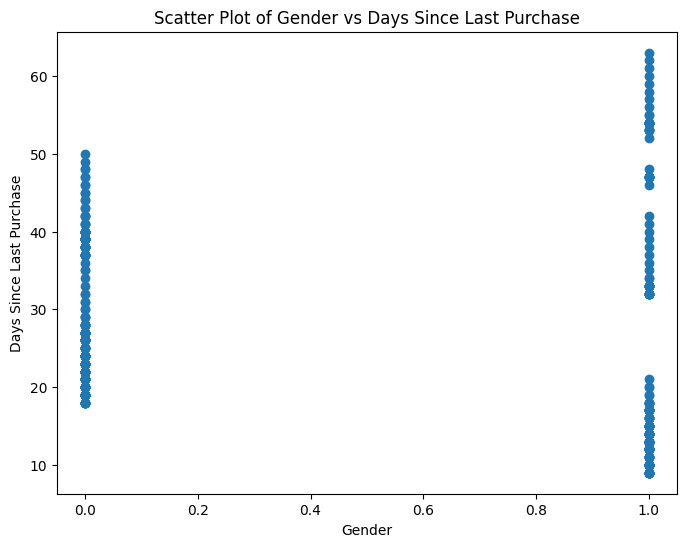

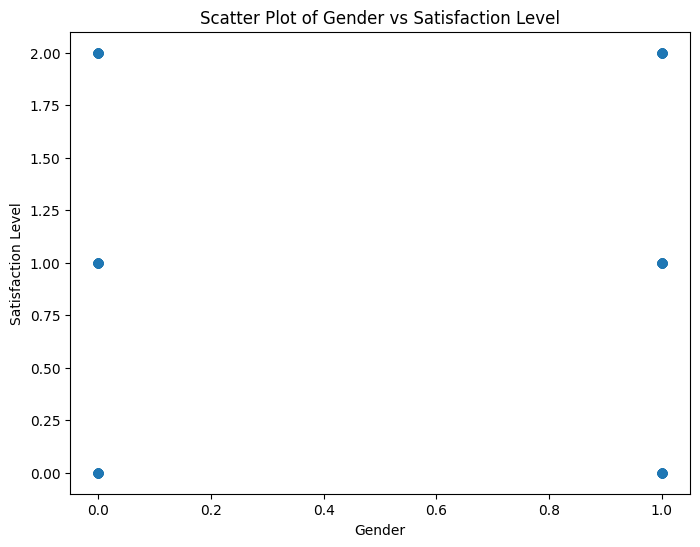

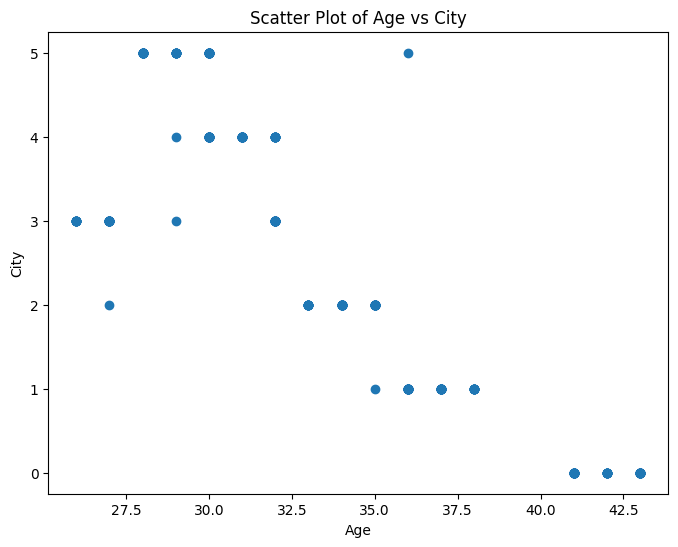

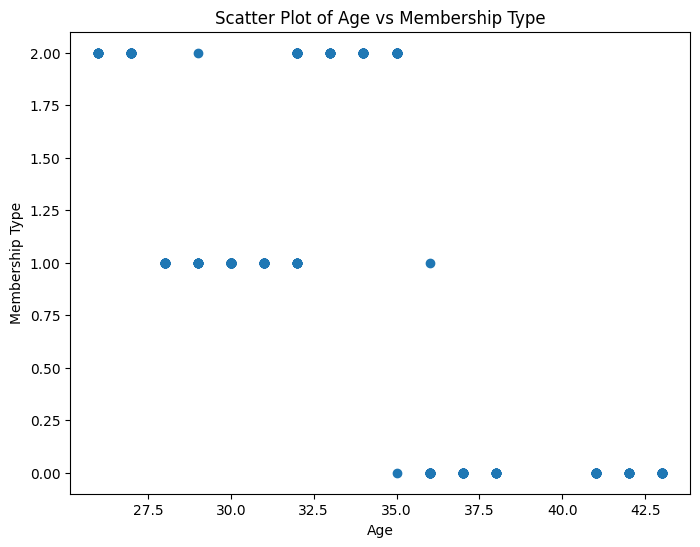

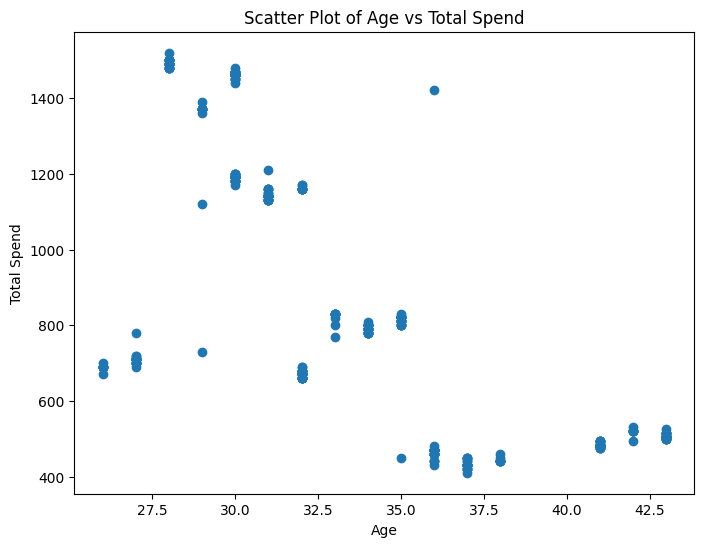

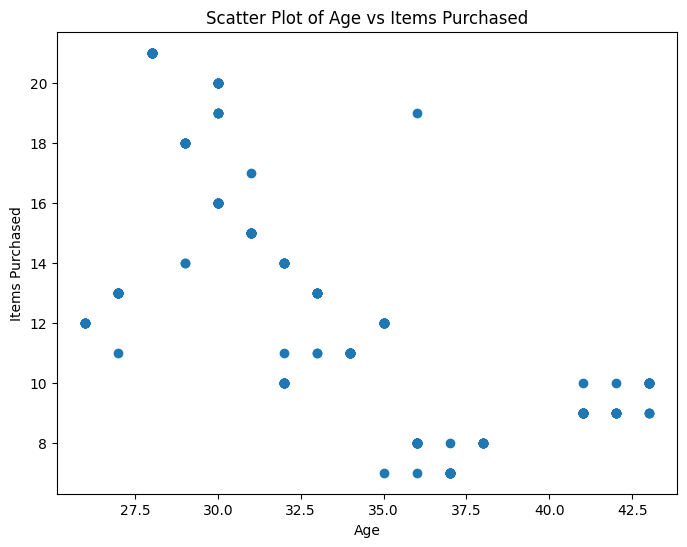

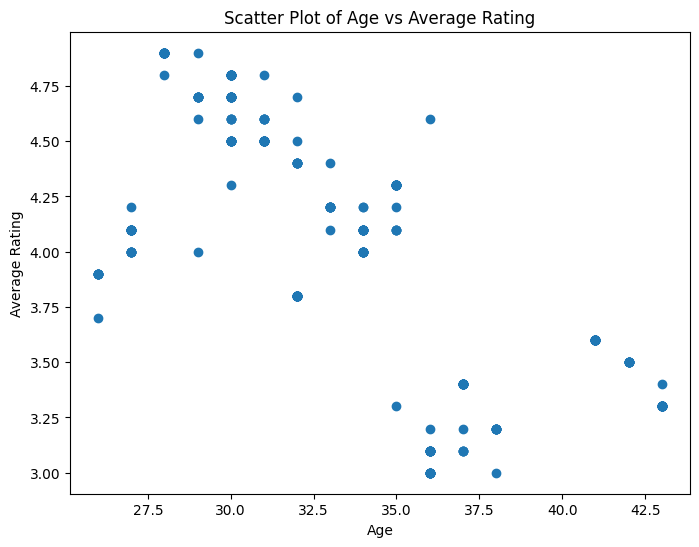

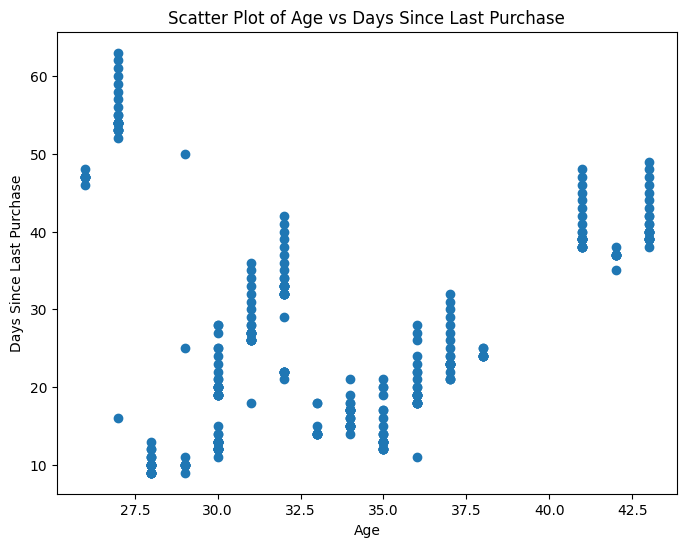

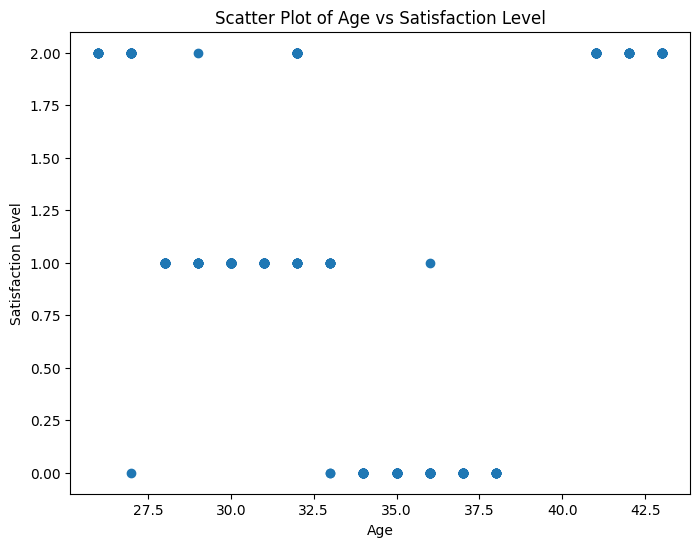

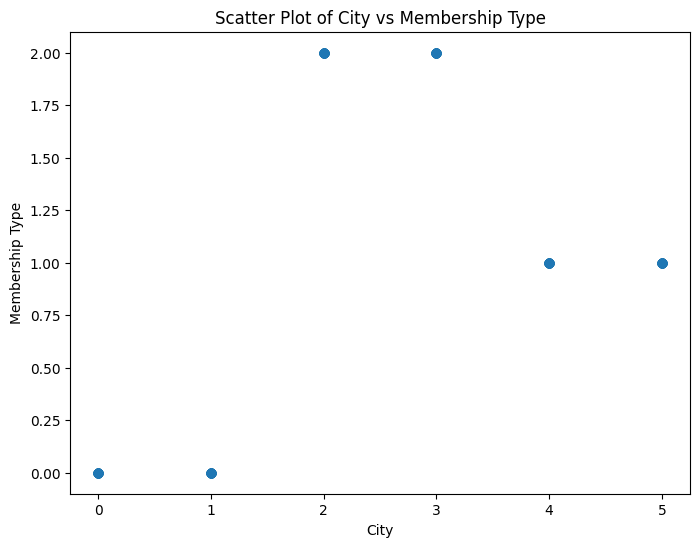

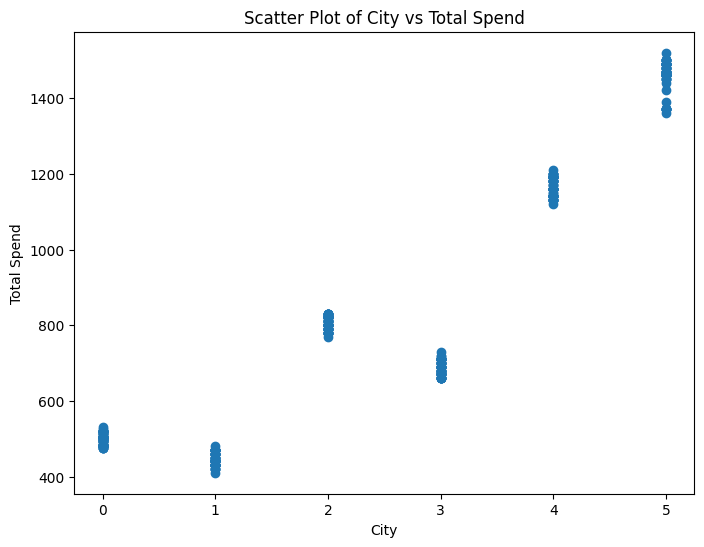

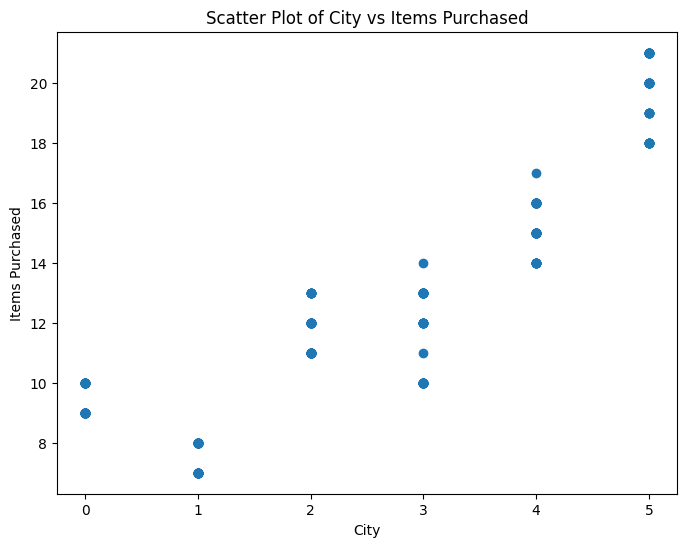

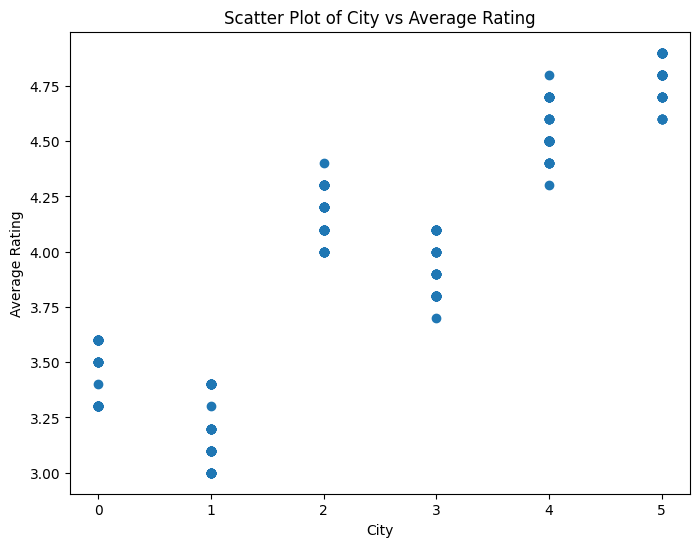

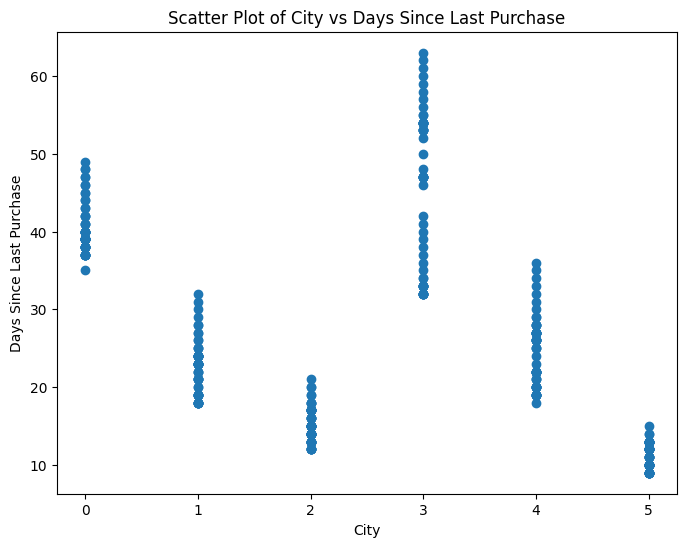

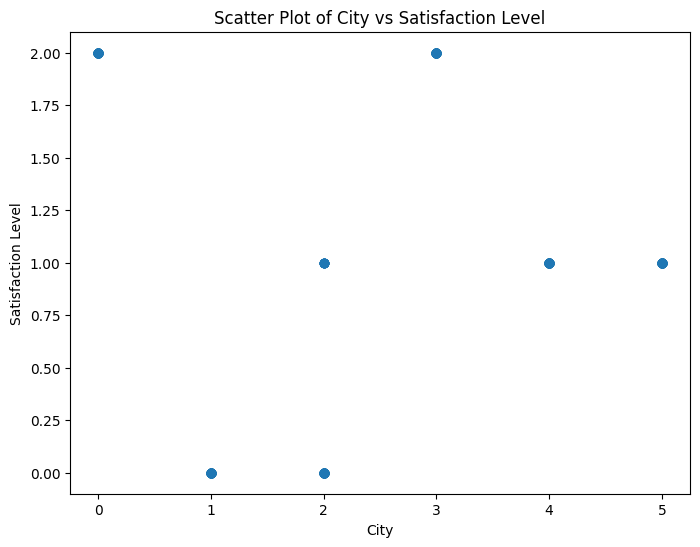

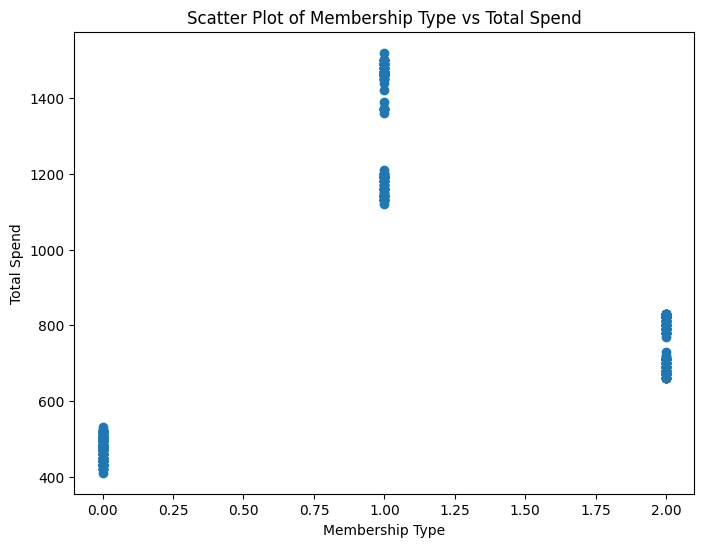

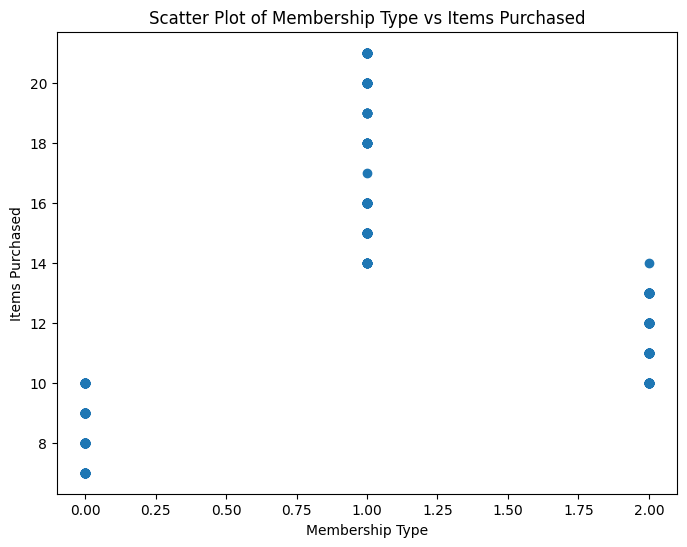

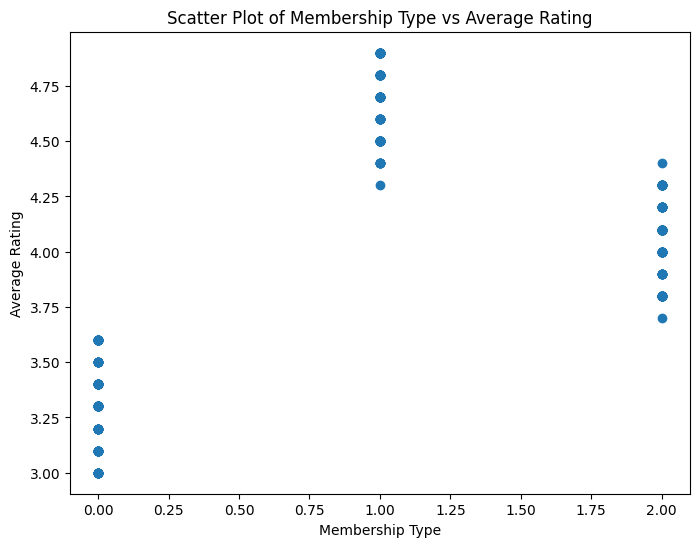

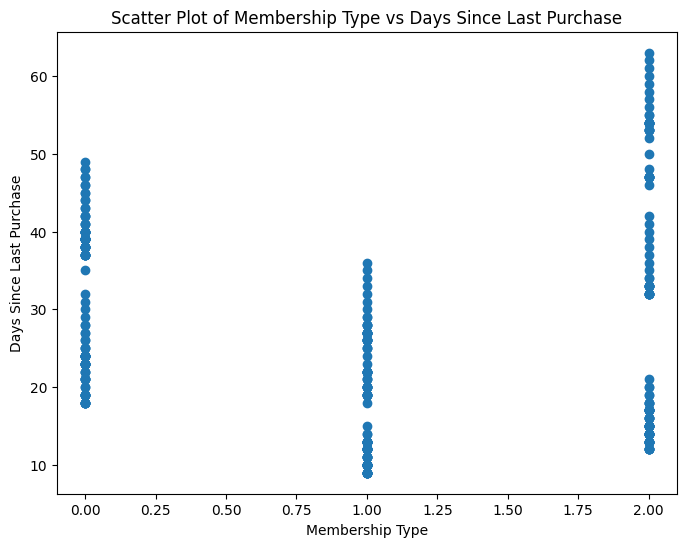

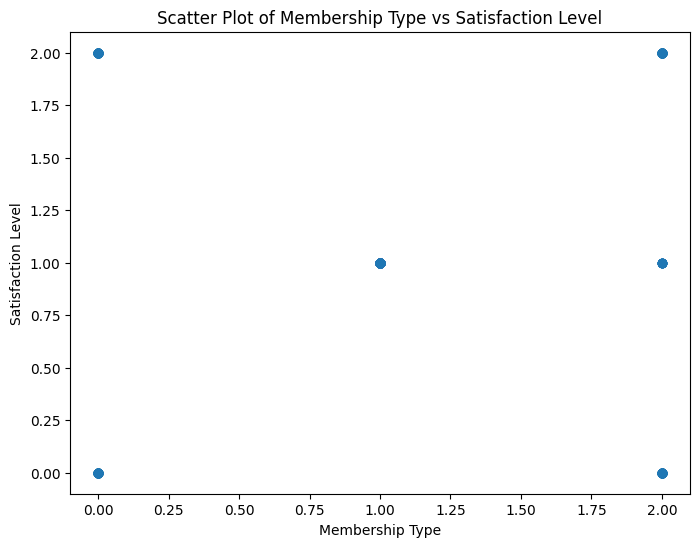

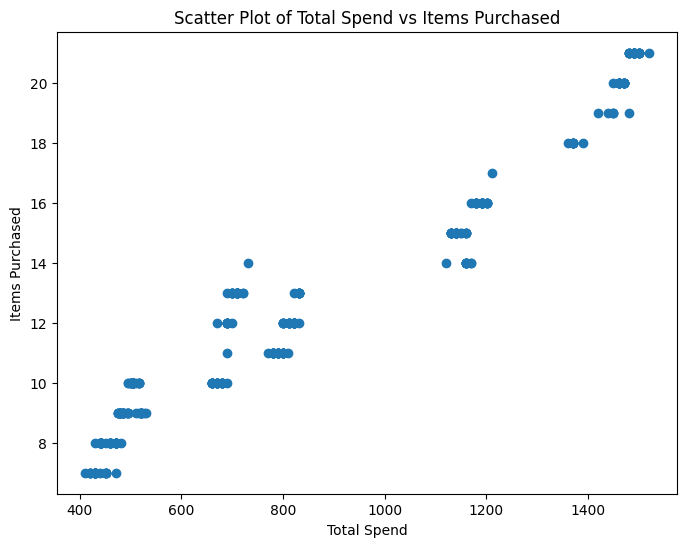

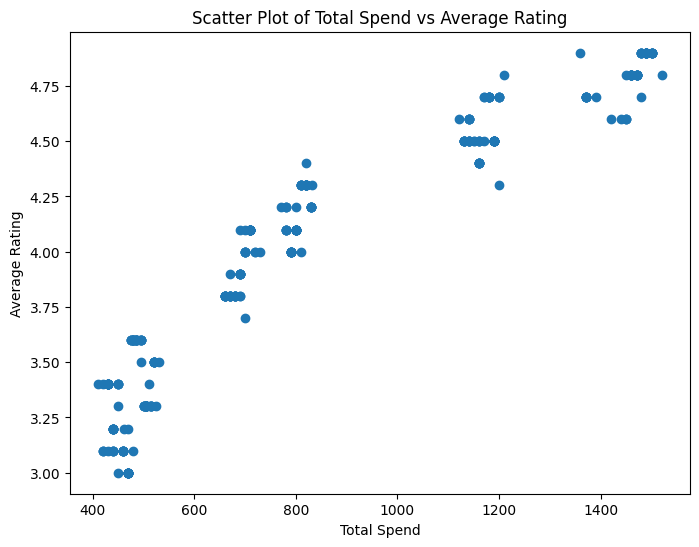

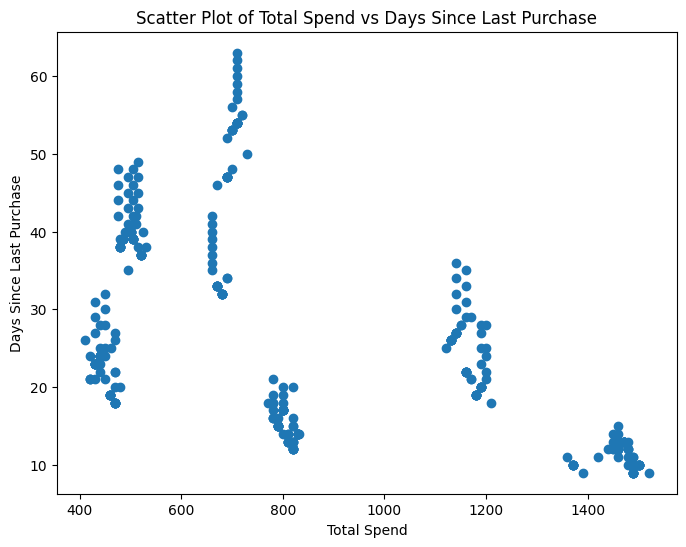

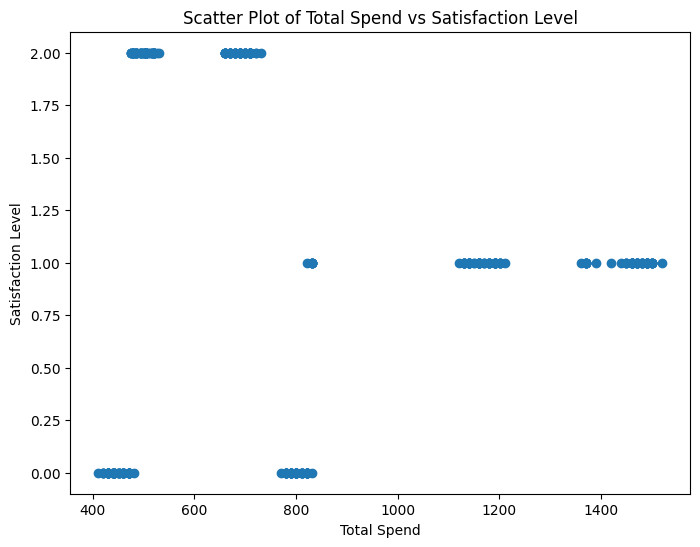

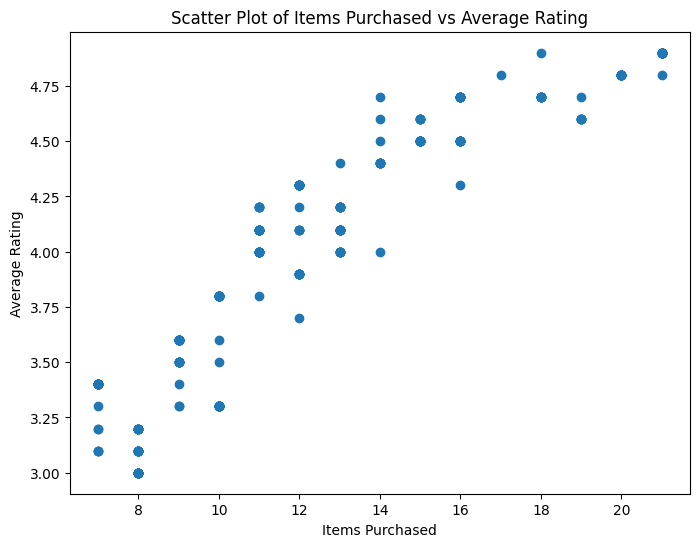

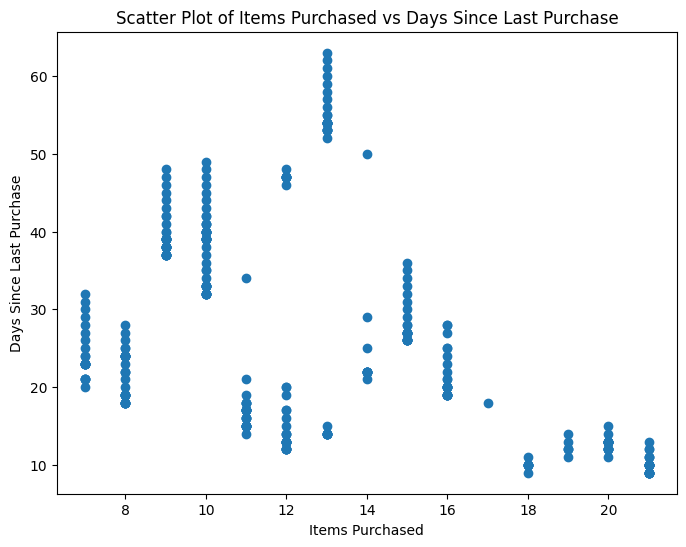

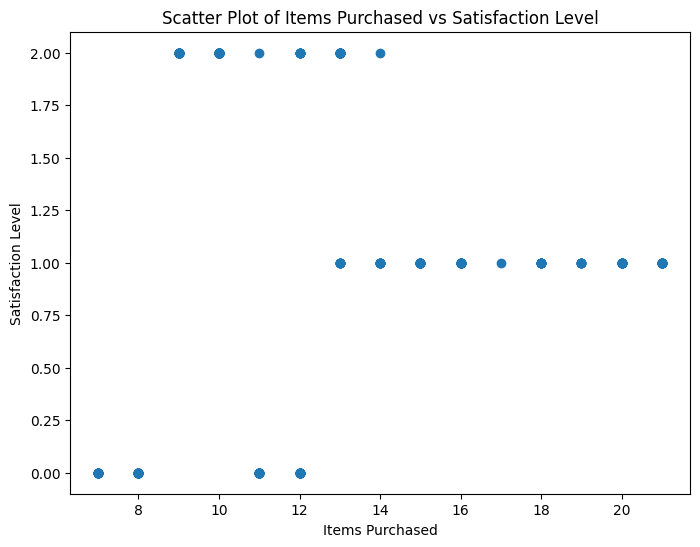

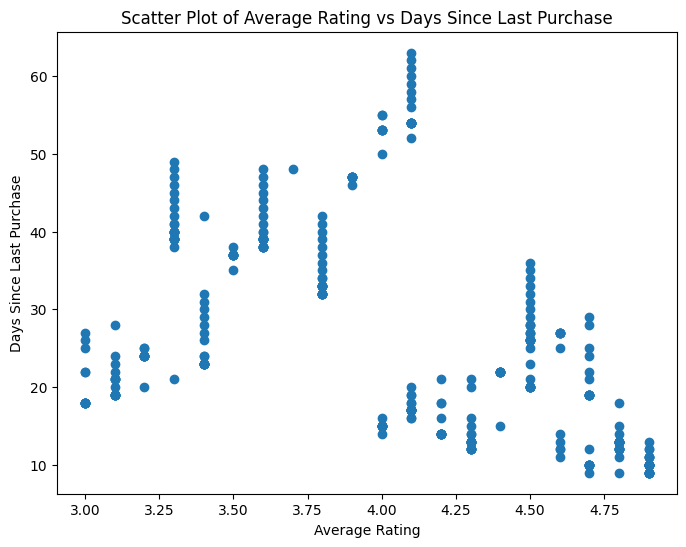

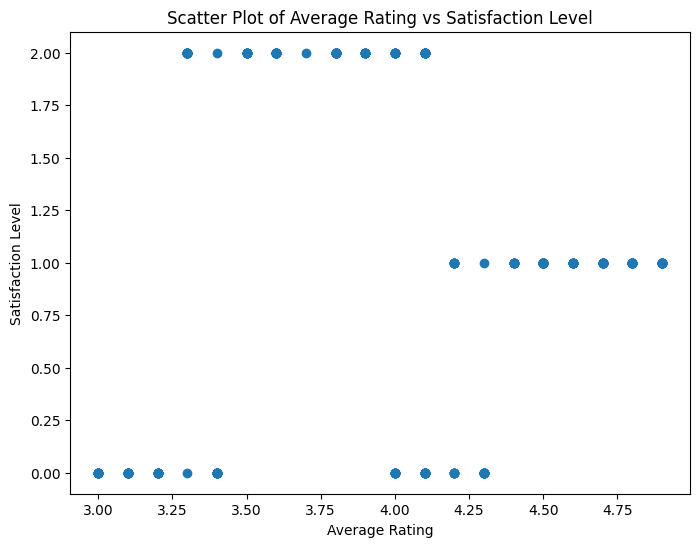

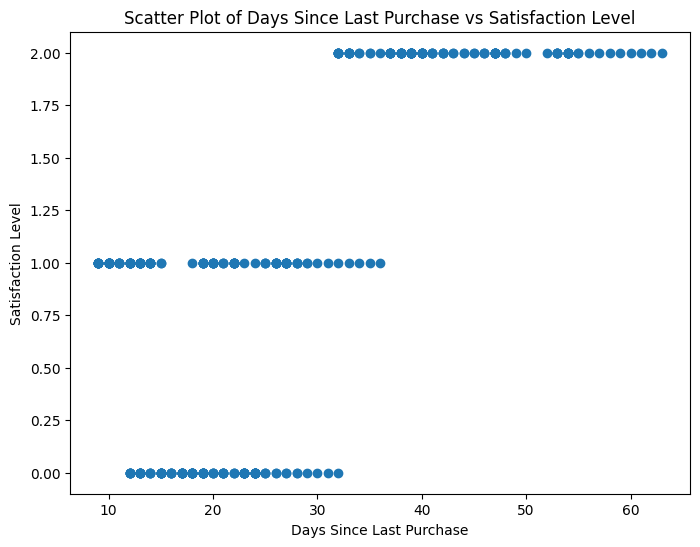

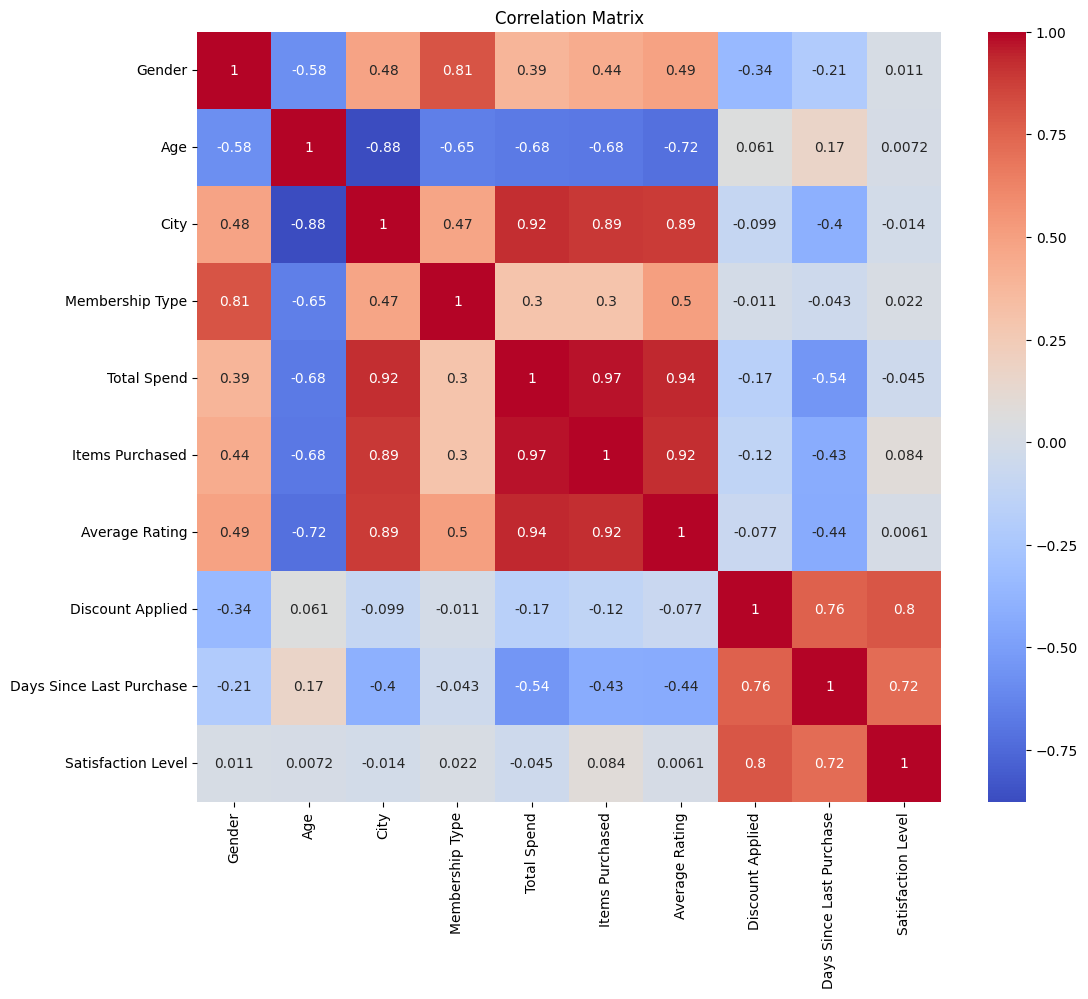

In [197]:
#EDA
for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {column}")
  plt.show()

numerical_features = df.select_dtypes(include=np.number).columns.tolist()

for i in range(len(numerical_features)):
  for j in range(i + 1, len(numerical_features)):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[numerical_features[i]], df[numerical_features[j]])
    plt.xlabel(numerical_features[i])
    plt.ylabel(numerical_features[j])
    plt.title(f"Scatter Plot of {numerical_features[i]} vs {numerical_features[j]}")
    plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [198]:
df.isnull().sum()

,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0
Satisfaction Level,0


In [199]:
#Declaring the target and features
x=df.drop(['Satisfaction Level'],axis=1)
y=df['Satisfaction Level']


In [202]:
#Scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
y_scaled = y_scaled.flatten()

In [203]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [204]:
#Model 1 - Logistic Regression


model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9809523809523809
Precision: 0.982363315696649
Recall: 0.9809523809523809
F1-Score: 0.9810744810744811


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:

# Model 2 - SVM
svm_model = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly'
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

# Metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("\nSVM Model Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)



SVM Model Metrics:
Accuracy: 0.9904761904761905
Precision: 0.9907084785133566
Recall: 0.9904761904761905
F1-Score: 0.9904747021484012


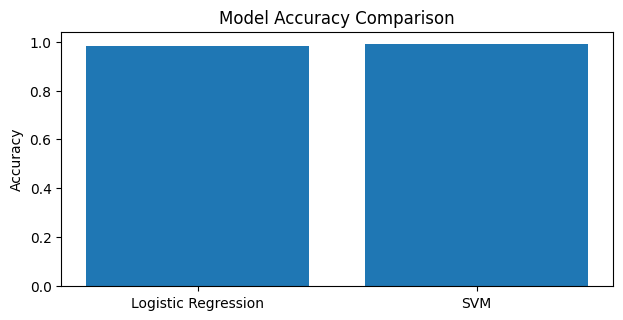

In [206]:
#Using the graph to comapre the performance

models = ['Logistic Regression', 'SVM']
accuracy_scores = [accuracy, accuracy_svm]
precision_scores = [precision, precision_svm]
recall_scores = [recall, recall_svm]
f1_scores = [f1, f1_svm]

x = range(len(models))

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(x, accuracy_scores)
plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')



plt.tight_layout()
plt.show()
